Default Of Credict Card Client: Machine Learning Project

Seeniya George

Entri Elevate

 Problem Statement Financial institutions face challenges in managing credit risk due to client defaults. Using the Default of Credit Card Clients Dataset, the goal is to build a machine learning model to:

    Predict the likelihood of a client defaulting on their credit card payments.
    Provide actionable insights to improve lending decisions and risk-based pricing

Objective The project aims to:

    Develop a classification model to predict whether a client will default.
    Use model predictions to categorize clients into low, medium, and high-risk groups.
    Interpret feature importance to derive actionable business insights.

 Dataset Overview

 Data Source

The **Default of Credit Card Clients Dataset** contains:

- 30,000 records of credit card clients.
- Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).
- Target variable: `default.payment.next.month` (1 = default, 0 = no default).


    limit balance : The limit balance of the amount of credit given in dollars (including individual and family / additional credit)
    sex : gender (1=male, 2=female)
    education_level : education level/Education level (1 = Masters, 2 = University, 3 = High School, 4 = other, 5 = unknown, 6 = unknown)
    marital_status : Marital status (1 = married, 2 = single, 3 = others)
    age : age or age in years
    pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly, 0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over)
    pay_2 : Payment status in August 2005 (same scale as above)
    pay_3 : Payment status in July 2005 (same scale as above)
    pay_4 : Payment status in June 2005 (same scale as above)
    pay_5 : Payment status in May 2005 (same scale as above)
    pay_6 : Payment status in April 2005 (same scale as above)
    bill_amt_1 : Total bill for September 2005 (NT dollar)
    bill_amt_2 : Total bill for August 2005 (NT dollar)
    bill_amt_3 : Total bill for July 2005 (NT dollar)
    bill_amt_4 : Total bill for June 2005 (NT dollar)
    bill_amt_5 : Total bill for May 2005 (NT dollar)
    bill_amt_6 : Total bill for April 2005 (NT dollar)
    pay_amt_1 : Amount of previous payment in September 2005 (NT dollars)
    pay_amt_2 : Amount of previous payment in August 2005 (NT dollars)
    pay_amt_3 : Amount of previous payment in July 2005 (NT dollars)
    pay_amt_4 : Amount of previous payment in June 2005 (NT dollars)
    pay_amt_5: Amount of previous payment in May 2005 (NT dollars)
    pay_amt_6: Amount of previous payment in April 2005 (NT dollars)
    default_payment_next_month: default payment next month (1=yes, 0=no)

It is hoped that it will produce an analysis that can provide information from the credit card system for the consideration of users in using credit card services. Or as an evaluation of credit card service providers.

Importing Libraries..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("Loading default of credict card client...")
data=pd.read_csv('credit_customer.csv')
data.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df=pd.DataFrame(data)

In [6]:
df.shape

(30000, 25)

In [7]:
#Basic Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
#removing data columns form dataset
df.drop(columns=['ID'],inplace=True)
print('Dataframe after removing date column permently\n')
df.head()

Dataframe after removing date column permently



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df['AGE'].min()

21

In [16]:
df['AGE'].max()

79

In [17]:
#outliyers
numeric_columns =  df.select_dtypes(include = ['number'])

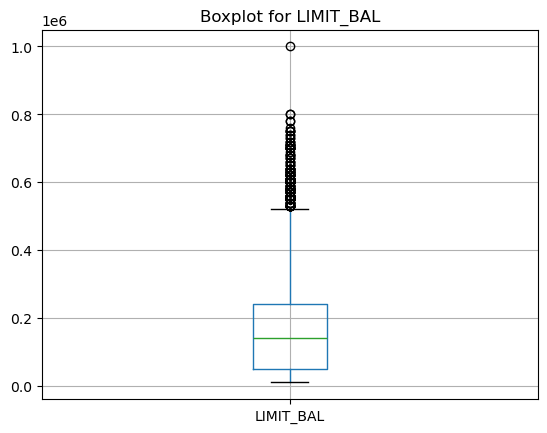

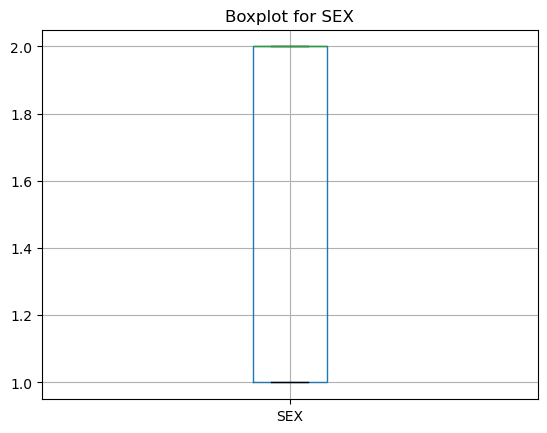

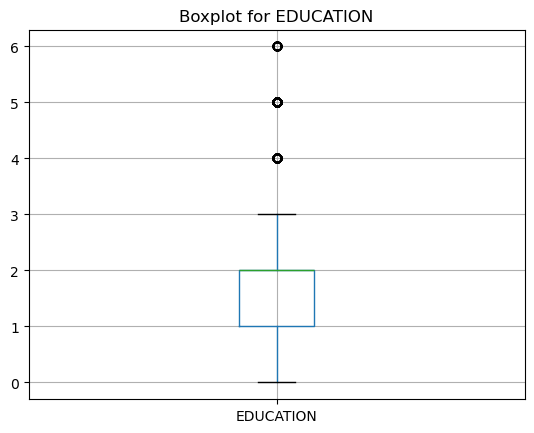

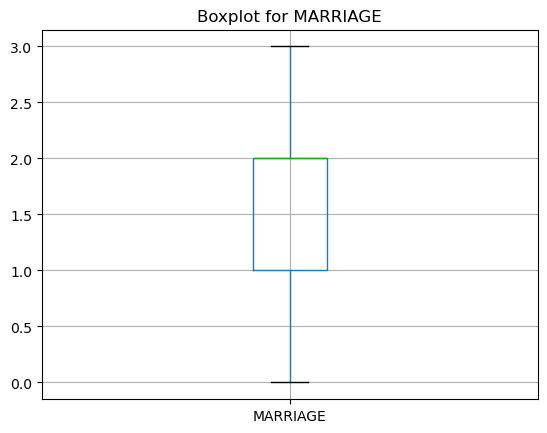

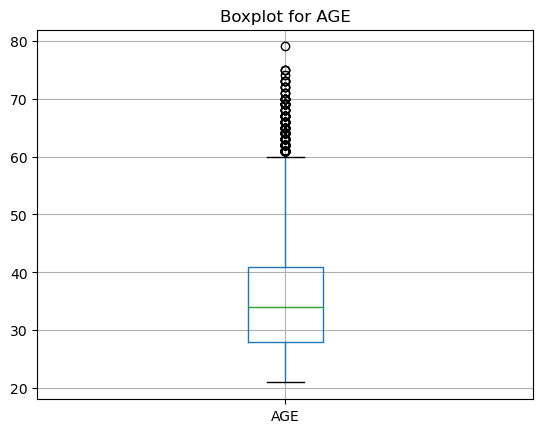

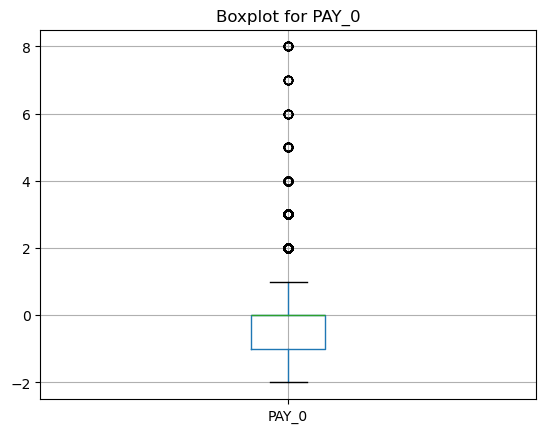

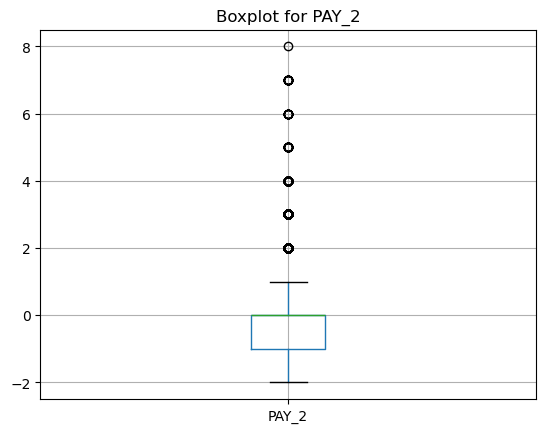

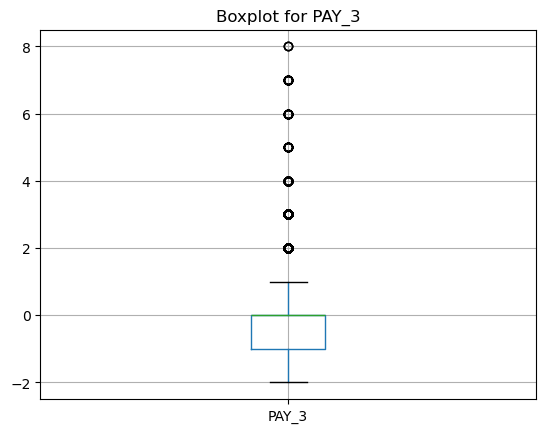

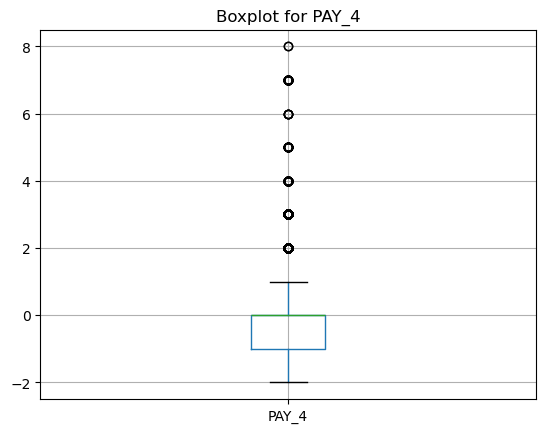

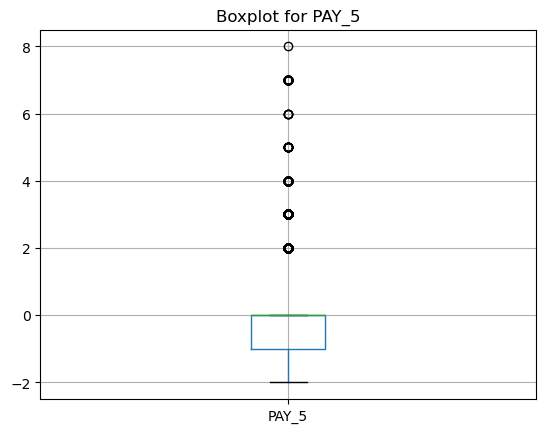

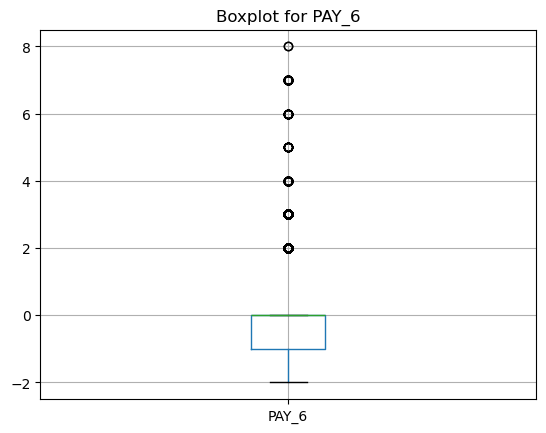

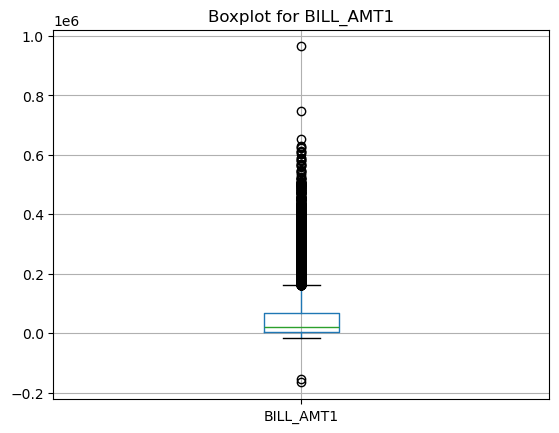

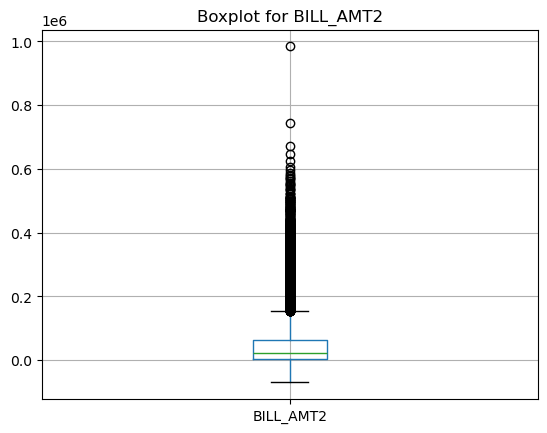

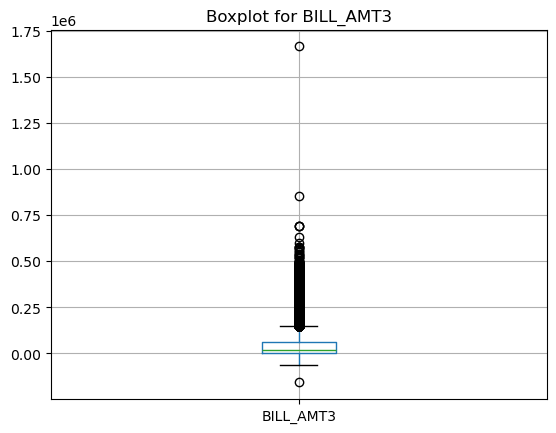

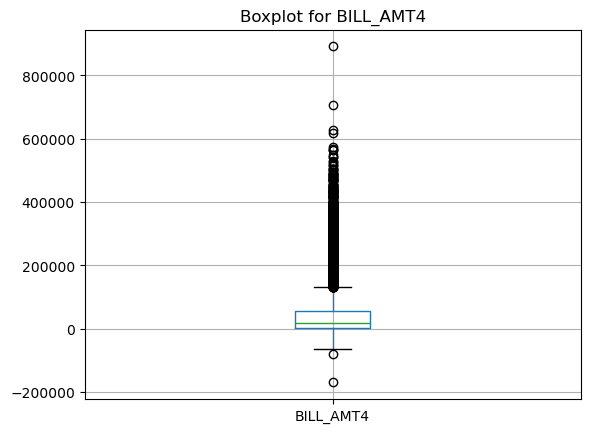

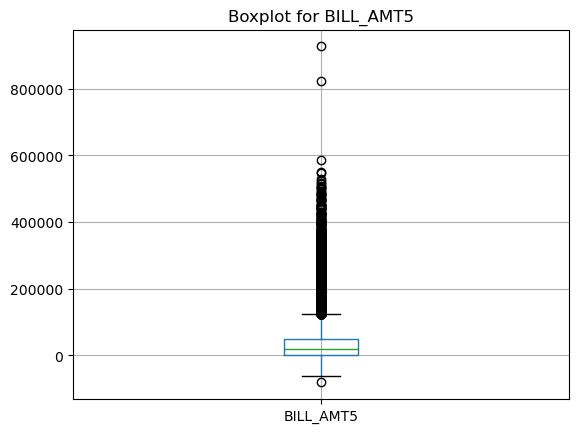

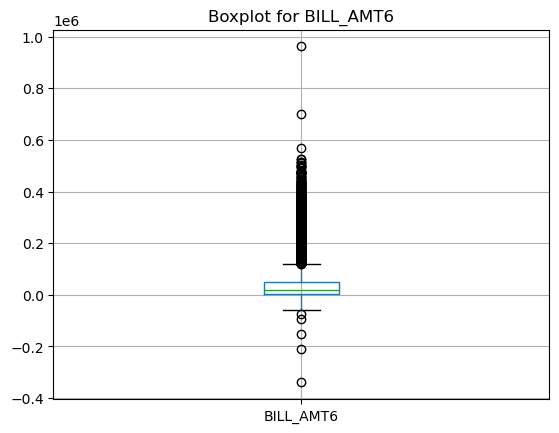

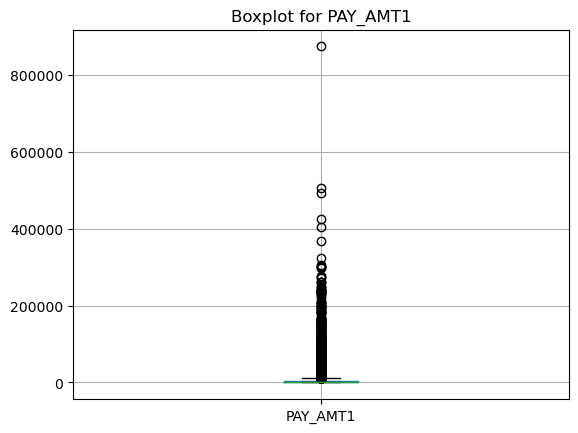

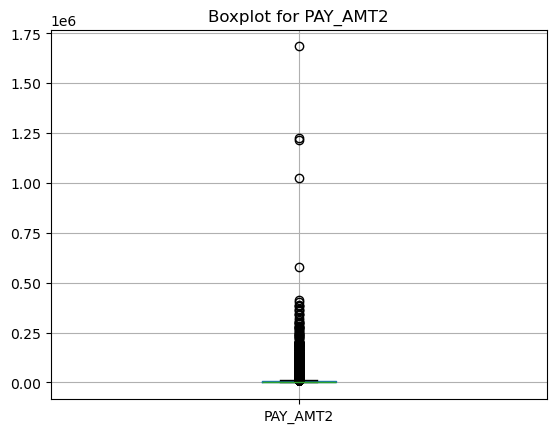

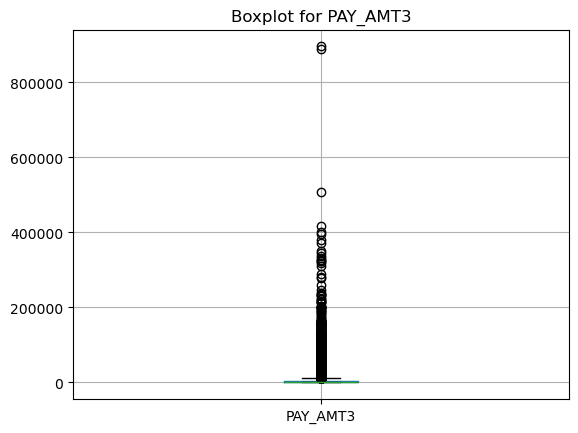

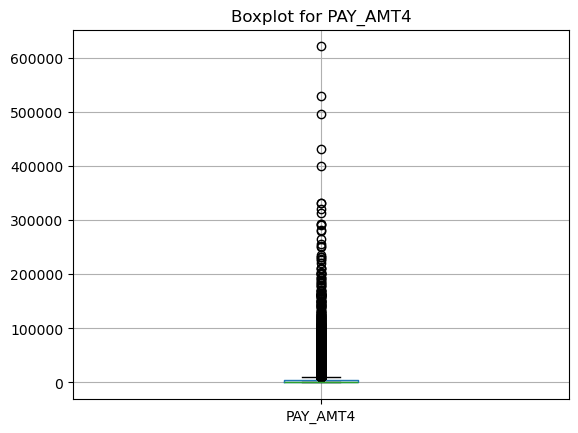

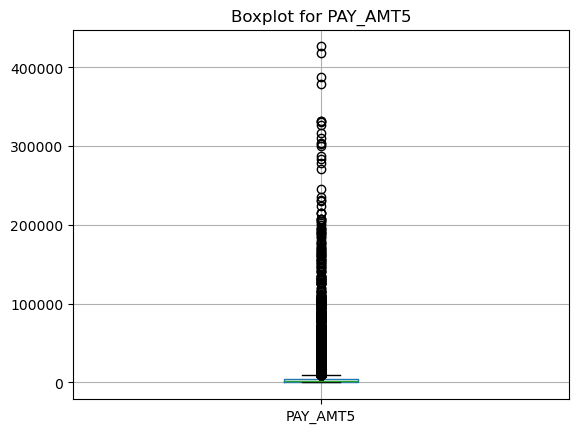

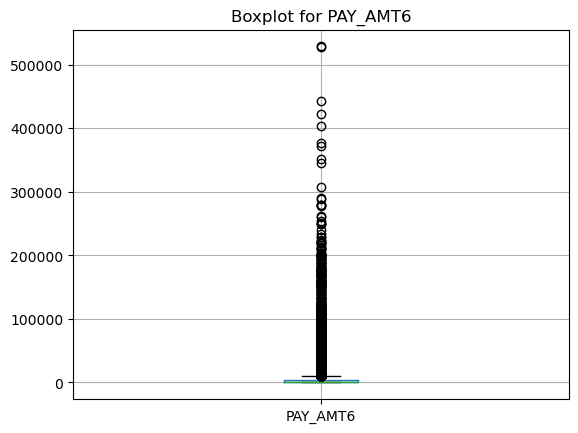

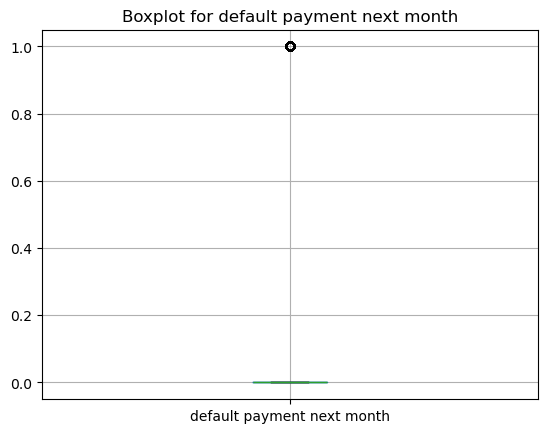

In [18]:
#forloop
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

Since this is a classification model the target feature's outliers can be left unaltered.
    The paystat features contain values of predetermined range(-2 to 9)and have categorical behavior so those columns doesnt have true outliers
    Features like sex, Education , has ordinal and binary encoded data, so outlier fixing is not a best practice


In [19]:
# These are the features having continues numerical values. (ordinal value having categotical behaviour doesnt have true outliers)
outlier_fix_columns = [
     'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

In [20]:
# Fix Outliers using the IQR method
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

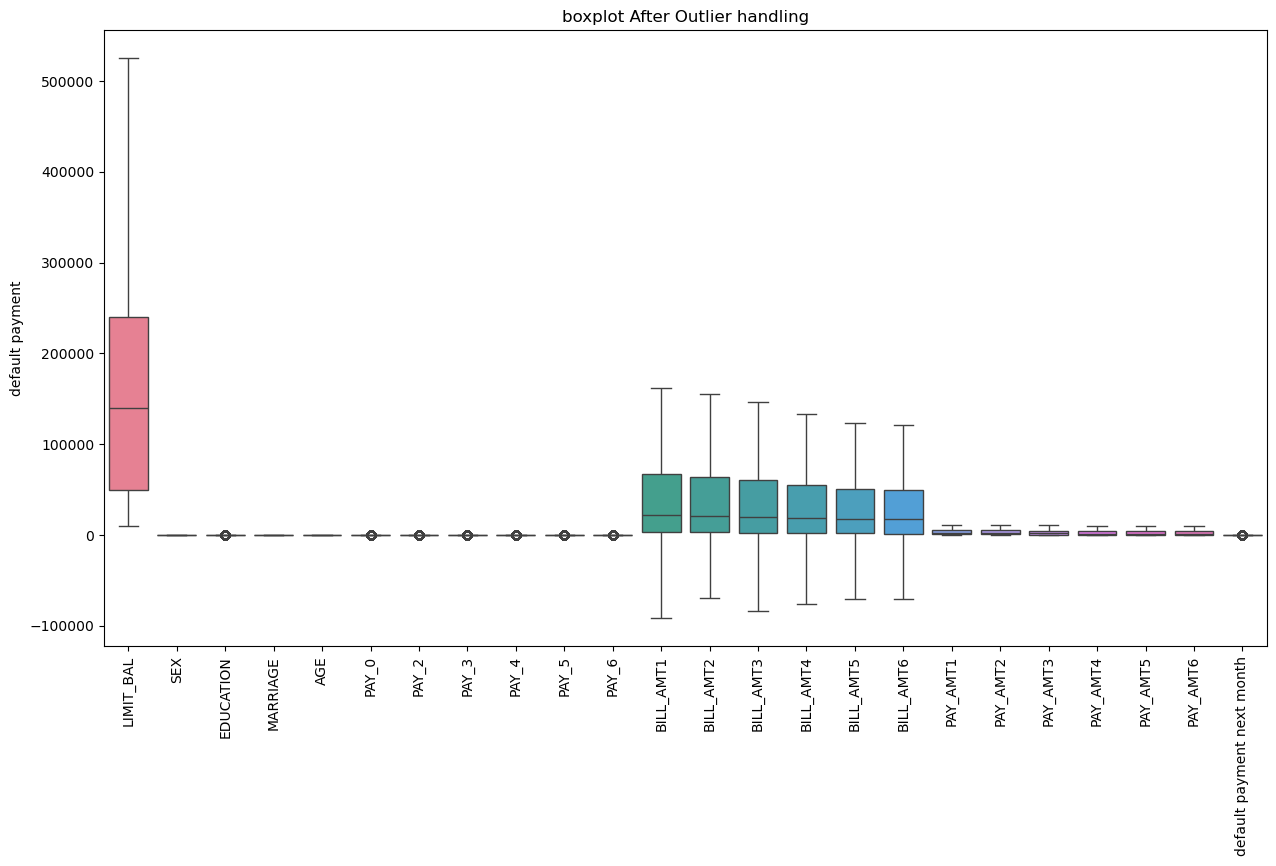

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

Checking skewness of the data

In [22]:
df[outlier_fix_columns].skew()

LIMIT_BAL    0.904504
AGE          0.654467
BILL_AMT1    1.194178
BILL_AMT2    1.189649
BILL_AMT3    1.184730
BILL_AMT4    1.183997
BILL_AMT5    1.184657
BILL_AMT6    1.199718
PAY_AMT1     1.032414
PAY_AMT2     1.113399
PAY_AMT3     1.200528
PAY_AMT4     1.176348
PAY_AMT5     1.183906
PAY_AMT6     1.211015
dtype: float64

In [23]:
df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [24]:
print(df['default payment next month'].value_counts())


default payment next month
0    23364
1     6636
Name: count, dtype: int64


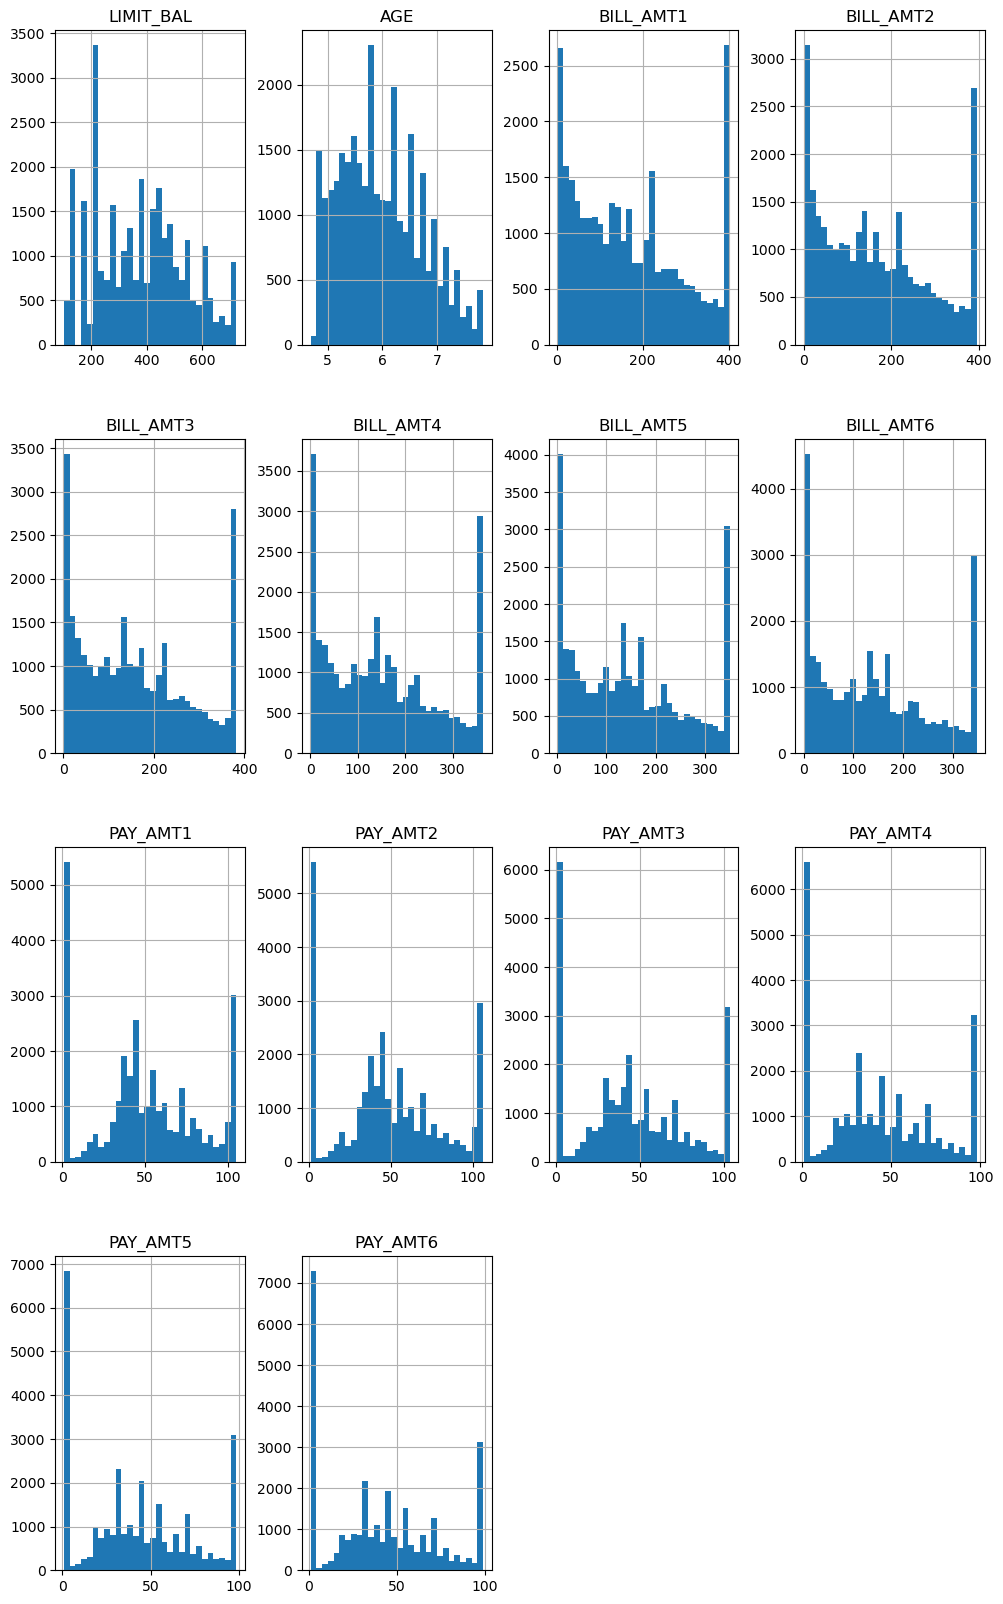

In [27]:
# Plot histograms before transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()


In [28]:
# Applying square root transformation to fix skewness of needed features

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)

In [29]:
print(df[outlier_fix_columns].skew())

LIMIT_BAL   -0.116937
AGE          0.344345
BILL_AMT1   -0.265578
BILL_AMT2   -0.290186
BILL_AMT3   -0.306018
BILL_AMT4   -0.310087
BILL_AMT5   -0.290046
BILL_AMT6   -0.252286
PAY_AMT1    -0.665888
PAY_AMT2    -0.609801
PAY_AMT3    -0.450294
PAY_AMT4    -0.369575
PAY_AMT5    -0.367094
PAY_AMT6    -0.326347
dtype: float64


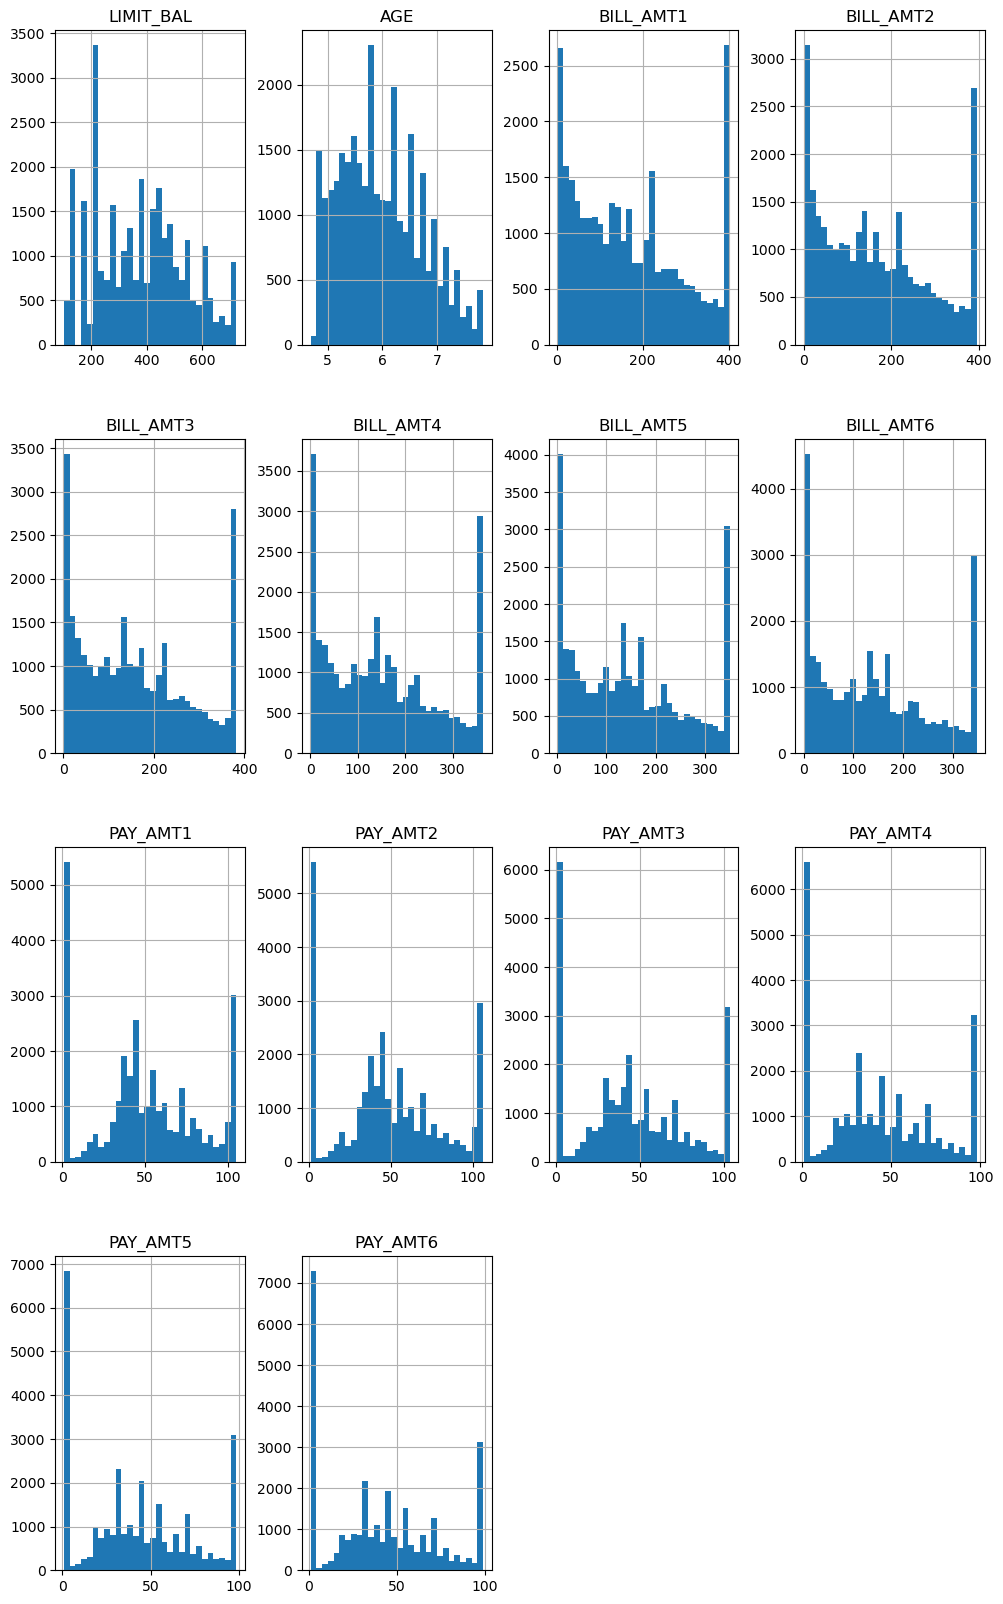

In [26]:
# Plot histograms After transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

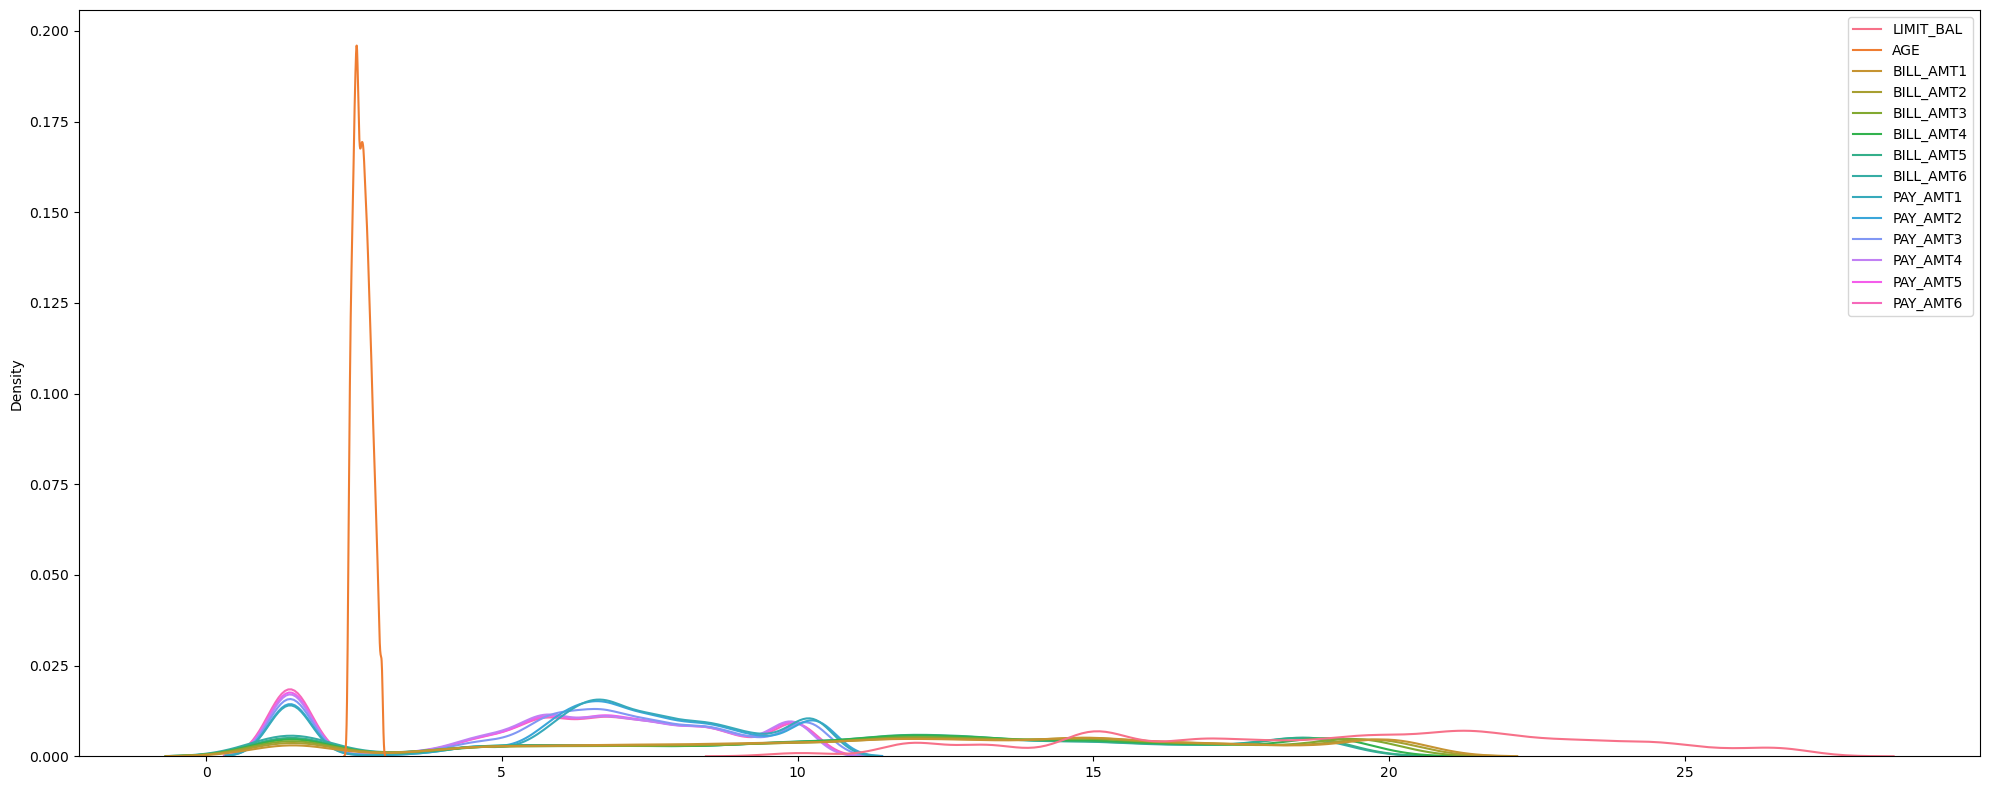

In [30]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

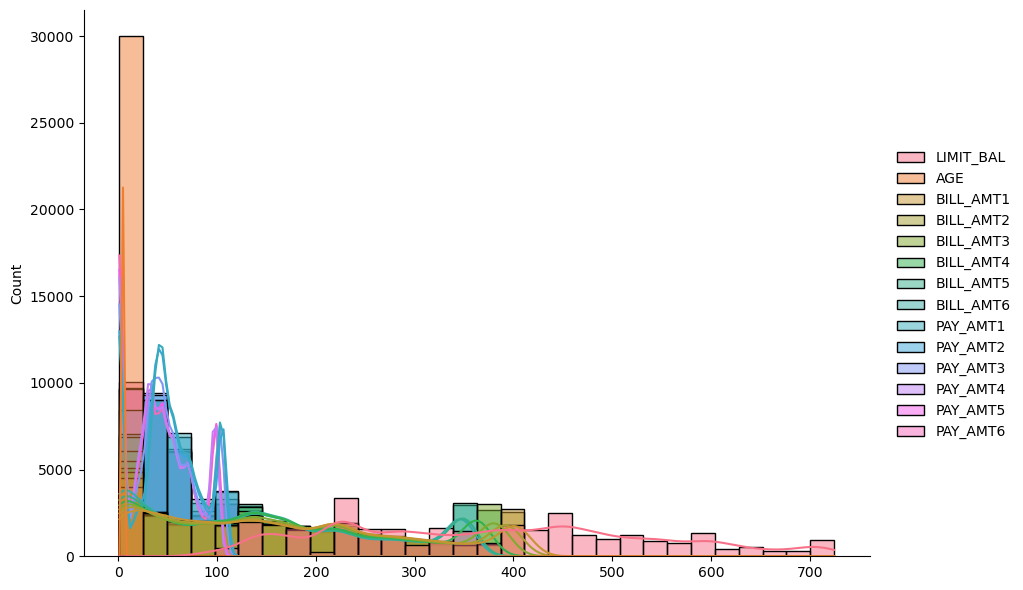

In [28]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distrib

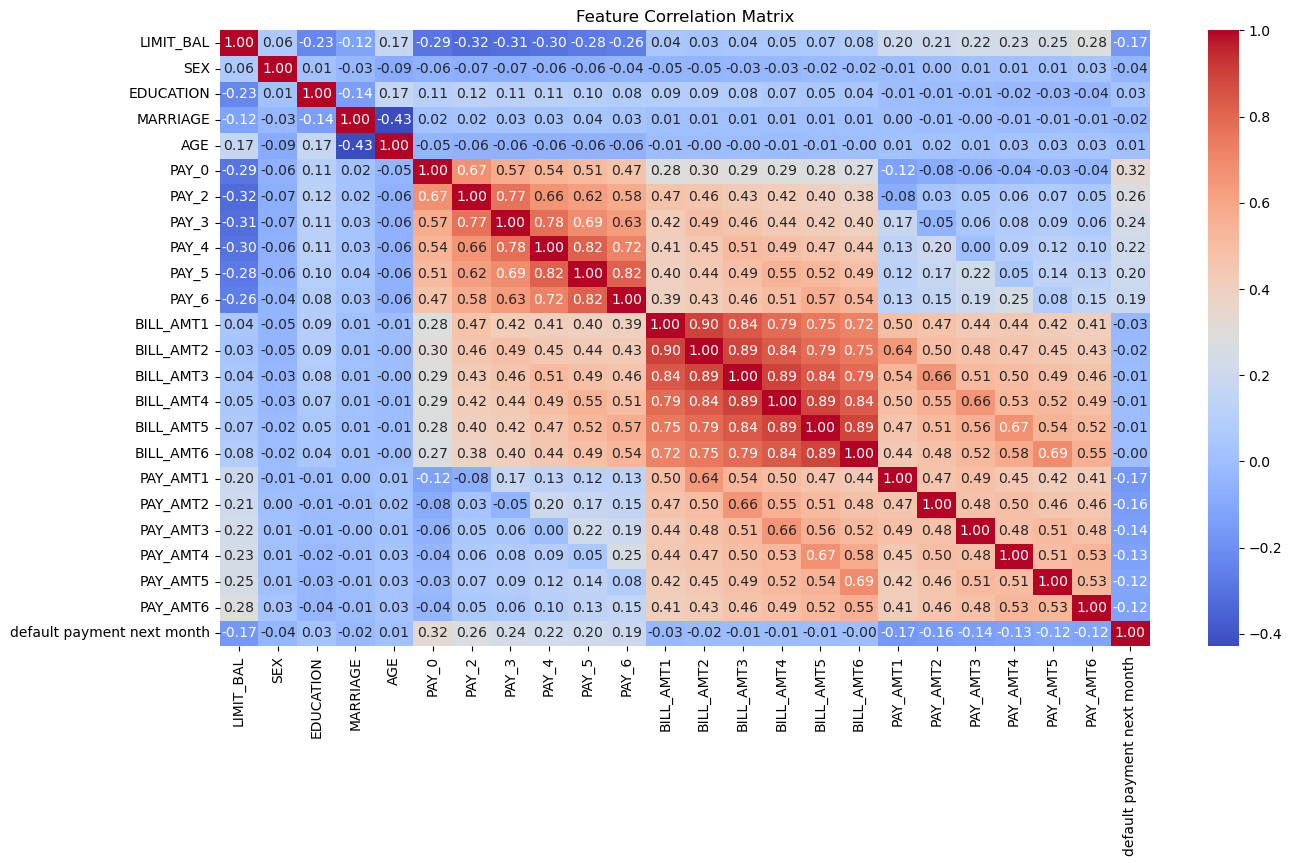

In [31]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [32]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE: Marital status where 1 is married 2 is single 3 is others and 0 is unknown

In [33]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

SEX : Gender where 1 represent MALE and 2 represent FEMALE

In [34]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

History of Past Payments

In [35]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Amount of Bill statement and Previous Statement

In [36]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.878923,11.650724,11.444181,11.141469,10.838688,10.593915
std,5.425708,5.504672,5.499243,5.423909,5.401361,5.501314
min,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
25%,7.807314,7.499962,7.327841,7.071068,6.648099,6.154525
50%,12.272782,12.112546,11.949639,11.793666,11.646390,11.484139
75%,16.127194,15.938276,15.694380,15.315997,15.003217,14.930790
max,20.099176,19.884289,19.586735,19.115027,18.747667,18.681873


In [37]:
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.515482,6.439850,6.122121,5.882055,5.867115,5.797860
std,2.824688,2.840539,2.858810,2.842069,2.871554,2.920546
min,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
25%,5.713019,5.466174,4.557820,4.270092,4.113593,3.449235
50%,6.843732,6.770009,6.590766,6.304184,6.304184,6.304184
75%,8.471137,8.468633,8.253893,8.022351,8.031312,8.015825
max,10.293548,10.347613,10.214540,9.946315,9.974651,10.005898


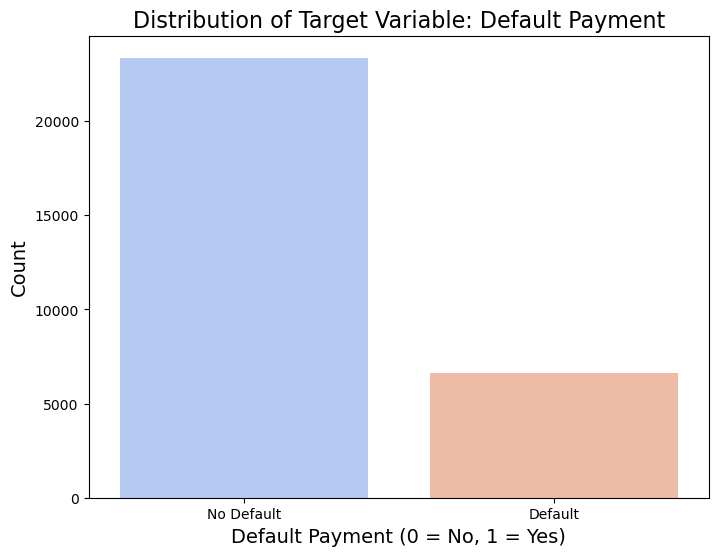

In [42]:
 #Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable: Default Payment", fontsize=16)
plt.xlabel("Default Payment (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

feature selection

Feature selection is a crucial step in machine learning to improve model performance, reduce overfitting, and enhance interpretability by identifying the most relevant predictors. Below are common methods for feature selection, categorized into three groups: filter methods, wrapper methods, and embedded methods.

In [43]:
# Define target and features
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']


In [46]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=40)

In [47]:
feature_names = df.columns

In [48]:
# Define k_features and fit selector
k_features = 10
selector = SelectKBest(score_func=f_classif, k=k_features)
selector.fit(X_train, y_train)


SelectKBest()

In [49]:
# SelectKBest with different scoring functions

k_best_f = SelectKBest(score_func=f_classif, k=10)
x_kbest_f = k_best_f.fit_transform(X, y)
selected_features_f = X.columns[k_best_f.get_support()].tolist()
#print
selected_features_f

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3']

In [50]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
def perform_feature_selection(X_train, X_test, y_train, feature_names=None, k=10):
    """
    Perform feature selection using SelectKBest with the f_classif scoring function.

    Parameters:
    - X_train: pandas DataFrame or numpy array, Training feature set.
    - X_test: pandas DataFrame or numpy array, Test feature set.
    - y_train: pandas Series or numpy array, Target variable for training.
    - feature_names: list of str, Names of the features. If None, default names are generated.
    - k: int, Number of top features to select.

    Returns:
    - X_train_selected: Transformed training set with selected features.
    - X_test_selected: Transformed test set with selected features.
    - selected_features: list of str, Names of the selected features.
    - feature_scores: pandas DataFrame, Scores of all features.
    """
    if k > X_train.shape[1]:
        raise ValueError("k should not exceed the number of features in the dataset")

    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

    if len(feature_names) != X_train.shape[1]:
        raise ValueError("Length of feature_names must match the number of features in X_train")

    # Initialize SelectKBest
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

In [52]:
feature_names = df.columns

In [53]:
# Define feature names if X_train_scaled is a DataFrame, otherwise generate synthetic names
if isinstance(X_train_scaled, pd.DataFrame):
    feature_names = X_train_scaled.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

# Perform feature selection
k_features = 15
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_selection(
    X_train_scaled, X_test_scaled, y_train, feature_names, k=k_features
)

# Display results
print("Selected Features:", selected_features)
print("Feature Scores:\n", feature_scores)

Selected Features: ['Feature_0', 'Feature_1', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22']
Feature Scores:
        Feature        Score
5    Feature_5  2749.266561
6    Feature_6  1725.816440
7    Feature_7  1372.356012
8    Feature_8  1212.048845
9    Feature_9  1053.505704
10  Feature_10   868.951574
0    Feature_0   732.714019
17  Feature_17   689.031757
18  Feature_18   592.428670
19  Feature_19   503.923076
20  Feature_20   401.108711
22  Feature_22   340.071333
21  Feature_21   318.925476
1    Feature_1    37.886622
11  Feature_11    20.393501
2    Feature_2    16.193906
3    Feature_3     9.596795
12  Feature_12     6.742422
13  Feature_13     4.732740
14  Feature_14     3.808340
15  Feature_15     3.053140
4    Feature_4     1.291877
16  Feature_16     0.220133


In [54]:
print("\nTop 15 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 15 Selected Features:
--------------------------------------------------
1. Feature_0: 732.71
2. Feature_1: 37.89
3. Feature_5: 2749.27
4. Feature_6: 1725.82
5. Feature_7: 1372.36
6. Feature_8: 1212.05
7. Feature_9: 1053.51
8. Feature_10: 868.95
9. Feature_11: 20.39
10. Feature_17: 689.03
11. Feature_18: 592.43
12. Feature_19: 503.92
13. Feature_20: 401.11
14. Feature_21: 318.93
15. Feature_22: 340.07


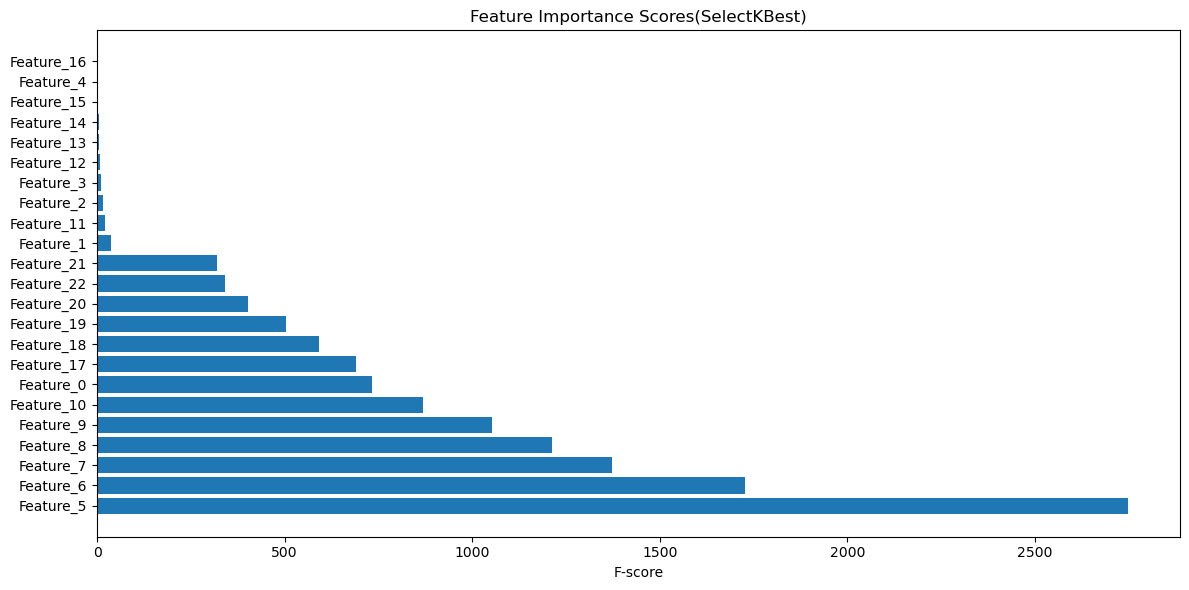

In [55]:
#Plot feature Score
plt.figure(figsize=(12,6))
plt.barh(range(len(feature_scores)), feature_scores['Score'])
plt.yticks(range(len(feature_scores)), feature_scores['Feature'], rotation=0)
plt.xlabel('F-score')
plt.title('Feature Importance Scores(SelectKBest)')
plt.tight_layout()
plt.show()


In [56]:
X = df[['PAY_0', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1',
        'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT2', 'BILL_AMT6']]

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [57]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler

StandardScaler()

In [58]:
# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 10)
X_test_scaled shape: (6000, 10)


MODEL BUILDING

In [59]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-NN': KNeighborsClassifier()
}


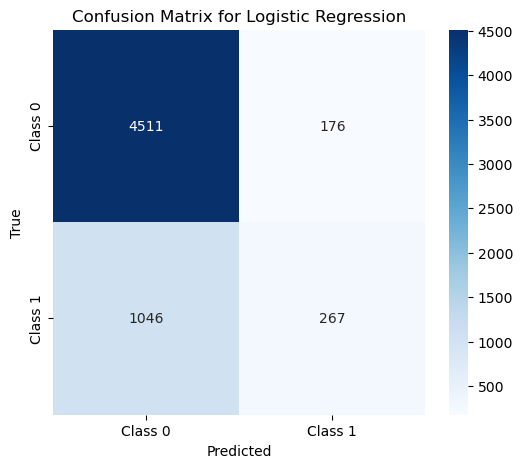

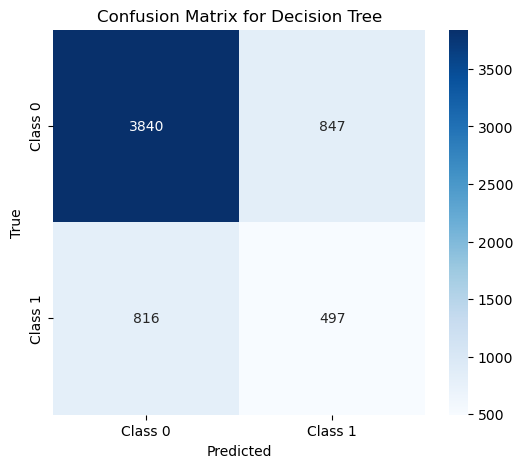

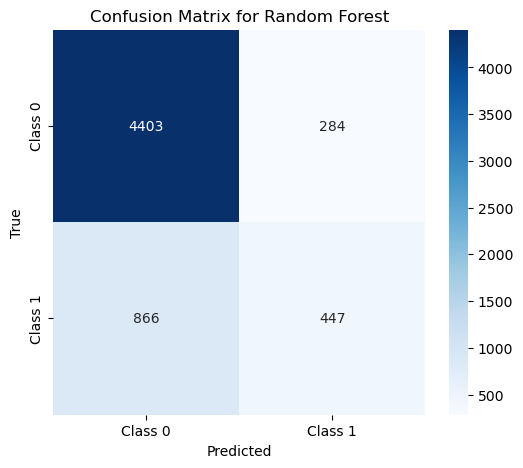

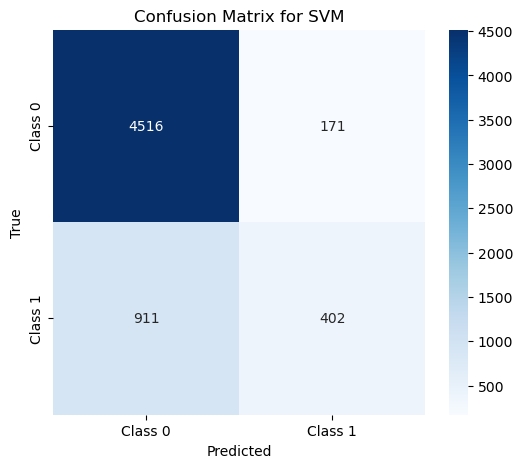

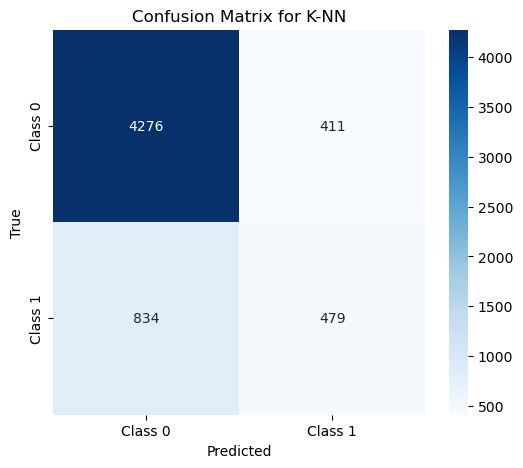


Logistic Regression:
Accuracy: 0.7963
Confusion Matrix:
[[4511  176]
 [1046  267]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4687
           1       0.60      0.20      0.30      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.58      0.59      6000
weighted avg       0.77      0.80      0.75      6000


Decision Tree:
Accuracy: 0.7228
Confusion Matrix:
[[3840  847]
 [ 816  497]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4687
           1       0.37      0.38      0.37      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.72      0.72      6000


Random Forest:
Accuracy: 0.8083
Confusion Matrix:
[[4403  284]
 [ 866  447]]
Classification Report:
              precision    recall  f1

In [60]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [63]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.7963
Decision Tree: Accuracy = 0.7228
Random Forest: Accuracy = 0.8083
SVM: Accuracy = 0.8197
K-NN: Accuracy = 0.7925


In [64]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is SVM with an accuracy of 0.8197
